# Houston Tunnel Mapping System (EDA)

Perform exploratory data analysis (EDA) on the Houston Tunnel GIS data.

In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tunnels = gpd.read_file('tunnels.geojson', engine='pyogrio')
tunnels.head()

,objectid,id,street,name,shape_stle,globalid,created_user,created_date,last_edited_user,last_edited_date,Shape__Length,geometry
0,1,0,,W. Walker,1142.962317,bdaf390d-5d03-4947-a5ad-75c0f20d56c6,HPDGIS,1635262453078,HPDGIS,1635262453078,2051.765223,"MULTILINESTRING ((-95.36945 29.76004, -95.3693..."
1,5,0,,Tunnel Loop,2747.780742,c851fb42-0f7b-437b-b227-1e9a3a2df0cc,HPDGIS,1635262453078,HPDGIS,1635262453078,2747.780742,"LINESTRING (-95.36678 29.75949, -95.36697 29.7..."
2,7,0,,N. Louisiana,1828.483435,ff2d7be6-733f-4620-80c8-656bcb144532,HPDGIS,1635262453078,HPDGIS,1635262453078,4687.772674,"MULTILINESTRING ((-95.36653 29.75943, -95.3664..."
3,8,0,,N. Travis,1001.174595,35cd96dc-a377-4347-8ea8-70c20b3e5bcb,HPDGIS,1635262453078,HPDGIS,1635262453078,3288.383734,"MULTILINESTRING ((-95.36528 29.75872, -95.3650..."
4,12,0,,S. Louisiana,784.170262,8ee89412-1ff2-401a-9455-7f784bbba8f7,HPDGIS,1635262453078,HPDGIS,1635262453078,6093.028881,"MULTILINESTRING ((-95.36781 29.75781, -95.3686..."


In [3]:
tunnels['name'].count()

10

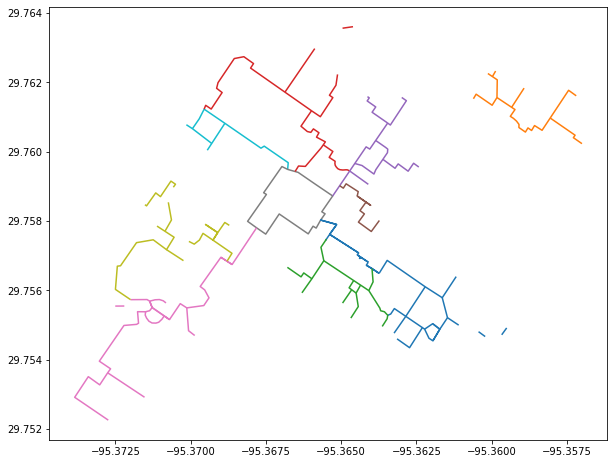

In [4]:
tunnels.plot(figsize=(10,10), column='name')
plt.show()

In [5]:
# Calculate the distance in meters and feet for UTM 15N (EPSG:32615)

meters = tunnels.to_crs('EPSG:32615').length
footage = meters * 3.2808399

tunnels['footage'] = footage

tunnels[['name', 'Shape__Length', 'footage']]

,name,Shape__Length,footage
0,W. Walker,2051.765223,2052.501395
1,Tunnel Loop,2747.780742,2748.764421
2,N. Louisiana,4687.772674,4689.448767
3,N. Travis,3288.383734,3289.555027
4,S. Louisiana,6093.028881,6095.227981
5,W. Dallas,3932.258388,3933.674946
6,E. McKinney,6123.856238,6126.038590
7,Harris County,2838.693581,2839.696459
8,Rusk,1230.002201,1230.440936
9,Lamar,3003.339136,3004.412333


In [6]:
# Calculate total miles of tunnels

tunnels['Shape__Length'].sum() / 5280

6.817591060077902

In [7]:
tunnels['footage'].sum() / 5280

6.820030464736701